In [1]:
import tensorflow as tf

from tensorflow.keras.applications import inception_v3

pre_trained_model = tf.keras.applications.InceptionV3(
                                include_top = False, 
                                weights = 'imagenet',
                                input_shape=(150,150,3))

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [2]:
modelFE = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [3]:
modelFE.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 24,162,466
Trainable params: 2,359,682
Non-trainable params: 21,802,784
_________________________________________________________________


In [4]:
import os

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.
)
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 988 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [6]:
modelFE.compile(loss='categorical_crossentropy',
              optimizer= 'SGD',
              metrics=['accuracy'])

In [7]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

49
6


In [8]:
history = modelFE.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=40,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/40
49/49 [==============================] - 13s 115ms/step - loss: 0.5799 - accuracy: 0.8006 - val_loss: 0.3318 - val_accuracy: 0.8833
Epoch 2/40
49/49 [==============================] - 3s 58ms/step - loss: 0.2757 - accuracy: 0.8957 - val_loss: 0.3283 - val_accuracy: 0.8833
Epoch 3/40
49/49 [==============================] - 3s 58ms/step - loss: 0.2060 - accuracy: 0.9298 - val_loss: 0.3857 - val_accuracy: 0.8833
Epoch 4/40
49/49 [==============================] - 3s 60ms/step - loss: 0.1608 - accuracy: 0.9432 - val_loss: 0.3497 - val_accuracy: 0.8833
Epoch 5/40
49/49 [==============================] - 3s 70ms/step - loss: 0.1259 - accuracy: 0.9592 - val_loss: 0.3406 - val_accuracy: 0.8917
Epoch 6/40
49/49 [==============================] - 3s 58ms/step - loss: 0.1070 - accuracy: 0.9618 - val_loss: 0.3783 - val_accuracy: 0.8917
Epoch 7/40
49/49 [==============================] - 3s 60ms/step - loss: 0.0739 - accuracy: 0.9783 - val_loss: 0.3897 - val_accuracy: 0.9083
Epoch 8/40


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

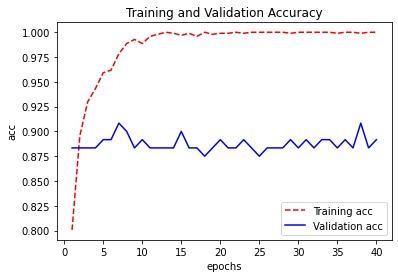

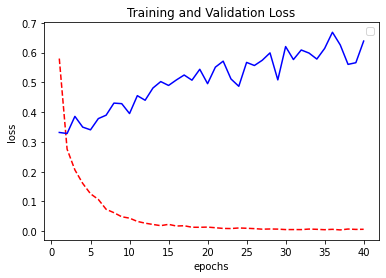

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [10]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

7/7 [==============================] - 2s 218ms/step - loss: 0.6545 - accuracy: 0.8790
Test Accuracy: 0.8790322542190552
